In [1]:
import sys
sys.path.append("../../../")

from utils import load
from utils.dicom import read_dcm
from utils.plot import plot, plot_volume
from utils.ct.segmentation import segment
from utils.cv import project

ct_paths = load("../../../output/lidc/paths.pkl")
ct_paths.head(3)

,Subject,lung
0,0001,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...
1,0003,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...
2,0004,(/data/lidc/manifest-1600709154662/LIDC-IDRI/L...


In [2]:
lung_paths = ct_paths.iloc[0]["lung"]
lung_sitk, lung_np = read_dcm(lung_paths, clip=True)

interactive(children=(IntSlider(value=1, description='val', max=219), Output()), _dom_classes=('widget-interac…

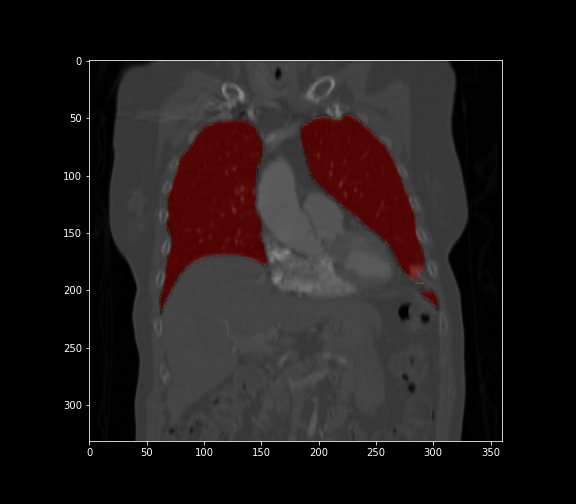

In [3]:
lung_mask, body_mask, bones_mask = segment(lung_sitk, lung_np, bone_threshold=70)
plot_volume(lung_np[:,140:,:], lung_mask[:,140:,:], axis=1)

interactive(children=(IntSlider(value=1, description='val', max=159), Output()), _dom_classes=('widget-interac…

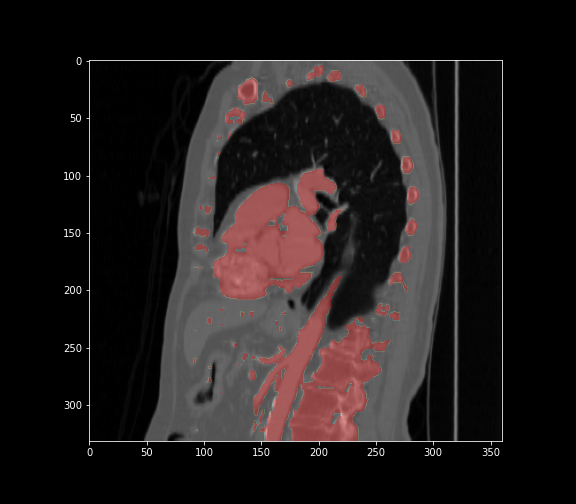

In [4]:
plot_volume(lung_np[:,:,200:], bones_mask[:,:,200:], axis=2)

interactive(children=(IntSlider(value=1, description='val', max=231), Output()), _dom_classes=('widget-interac…

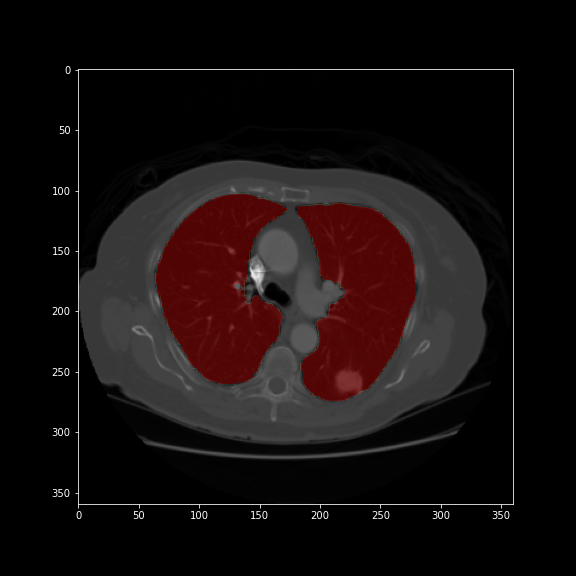

In [5]:
plot_volume(lung_np[100:,:,:], lung_mask[100:,:,:], axis=0)

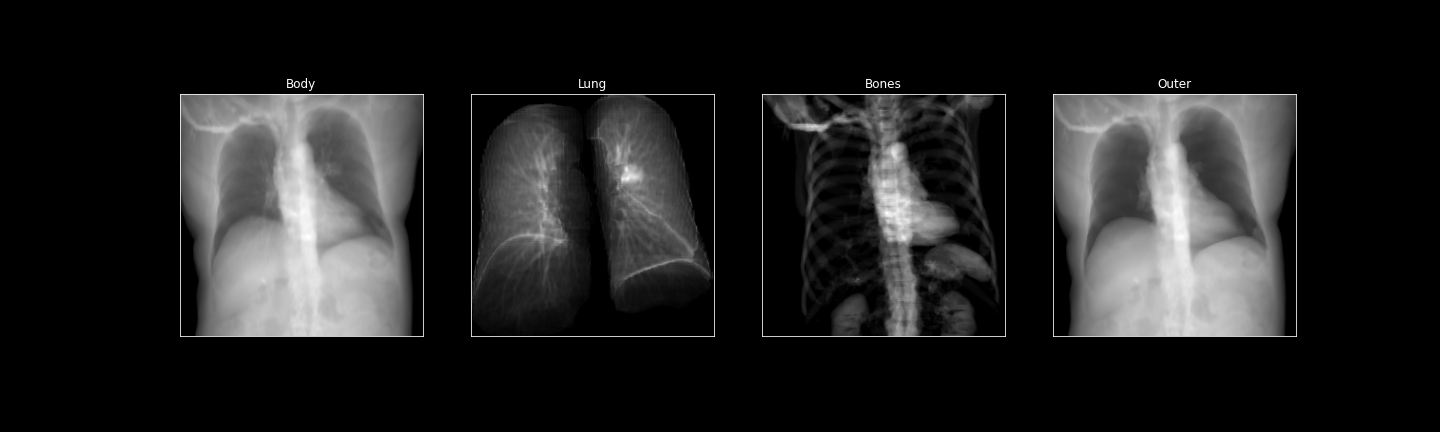

In [6]:
"""
Get Projections
"""

body = project(lung_np * body_mask, crop_size=256)
lung = project(lung_np * lung_mask, crop_size=256)
bones = project(lung_np * bones_mask, crop_size=256)
chest = project(lung_np * body_mask * (~lung_mask), crop_size=256)
plot([body, lung, bones, chest], ("Body", "Lung", "Bones", "Outer"))